# Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import os
import os.path
from pathlib import Path
import glob

from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

from keras.optimizers import Adam,Optimizer

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D, TimeDistributed, Bidirectional, LSTM
from keras import models
from keras import layers
import tensorflow as tf
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# Path

In [3]:
Brain_CT_Path = Path("/content/Data")
JPG_Path = list(Brain_CT_Path.glob("**/*.jpg"))


# Label

In [4]:
# labels of images are seperated
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

# Transformation to series

In [5]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")

# Transformation to Dataframe

In [6]:
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

In [7]:
print(Main_Data)

                                                    JPG CATEGORY
0     /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_127.jpg     5[5]
1      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_38.jpg     5[5]
2      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_34.jpg     5[5]
3      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_37.jpg     5[5]
4      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_29.jpg     5[5]
...                                                 ...      ...
6767           /content/Data/NORMAL/N1[N1]/N1_0_200.jpg   N1[N1]
6768            /content/Data/NORMAL/N1[N1]/N1_0_46.jpg   N1[N1]
6769           /content/Data/NORMAL/N1[N1]/N1_0_152.jpg   N1[N1]
6770            /content/Data/NORMAL/N1[N1]/N1_0_95.jpg   N1[N1]
6771            /content/Data/NORMAL/N1[N1]/N1_0_58.jpg   N1[N1]

[6772 rows x 2 columns]


# Replacing 

In [8]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

In [9]:
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

# Labelled Data

In [10]:
print(Main_Data)

                                                    JPG    CATEGORY
0     /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_127.jpg  Hemorrhage
1      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_38.jpg  Hemorrhage
2      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_34.jpg  Hemorrhage
3      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_37.jpg  Hemorrhage
4      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_29.jpg  Hemorrhage
...                                                 ...         ...
6767           /content/Data/NORMAL/N1[N1]/N1_0_200.jpg      Normal
6768            /content/Data/NORMAL/N1[N1]/N1_0_46.jpg      Normal
6769           /content/Data/NORMAL/N1[N1]/N1_0_152.jpg      Normal
6770            /content/Data/NORMAL/N1[N1]/N1_0_95.jpg      Normal
6771            /content/Data/NORMAL/N1[N1]/N1_0_58.jpg      Normal

[6772 rows x 2 columns]


In [11]:
print(Main_Data["CATEGORY"].value_counts())

Normal        4105
Hemorrhage    2667
Name: CATEGORY, dtype: int64


# Shuffling

In [12]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)


# Visualization

In [13]:
plt.style.use('dark_background')

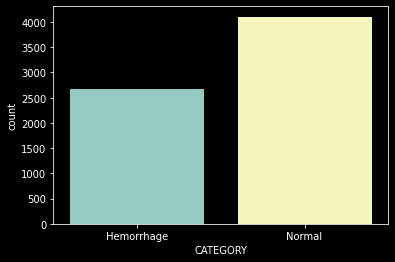

In [14]:
sns.countplot(Main_Data["CATEGORY"])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

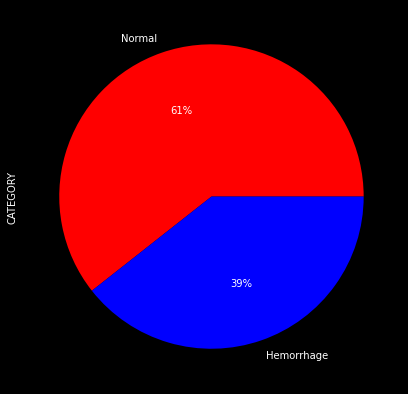

In [15]:
Colors=['red','blue']
Main_Data["CATEGORY"].value_counts().plot.pie(figsize=(7,7),autopct='%.0f%%',colors=Colors)
plt.show

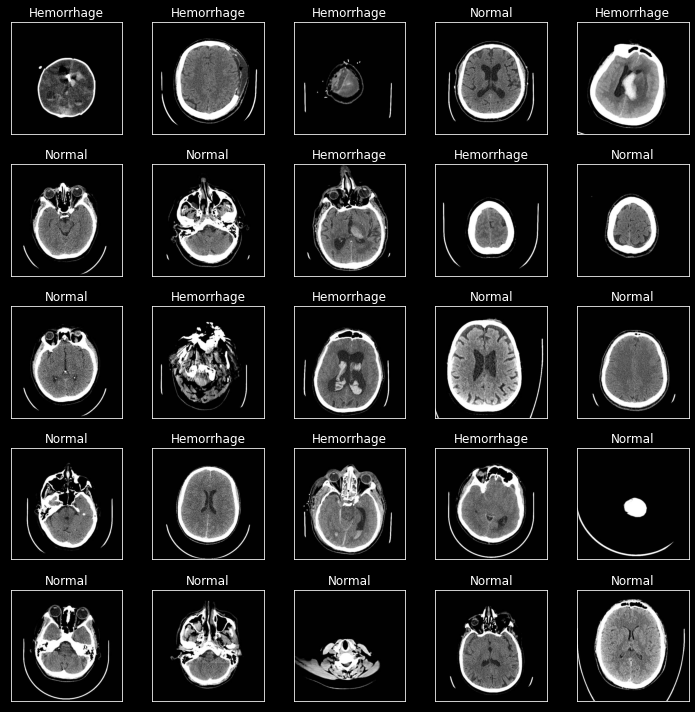

In [16]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# Determination of Train and Test Data

In [17]:

Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.9,shuffle=True,random_state=42)

In [18]:
print("TRAIN SHAPE(rows,columns) : ",Train_Data.shape)
print("TEST SHAPE(rows,columns)  : ",Test_Data.shape)

TRAIN SHAPE(rows,columns) :  (6094, 2)
TEST SHAPE(rows,columns)  :  (678, 2)


# Augmentation

In [19]:
Generator = ImageDataGenerator(rescale=1.0/255,
                               zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True,
                               fill_mode="nearest",
                               validation_split=0.1
                              )
Test_Generator = ImageDataGenerator(rescale=1.0/255)

In [20]:
Train_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                              
                                             class_mode="categorical",
                                              subset="training"
                                             )

Found 5485 validated image filenames belonging to 2 classes.


In [21]:
Validation_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             
                                            
                                             class_mode="categorical",
                                              subset="validation"
                                             )

Found 609 validated image filenames belonging to 2 classes.


In [22]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                 
                                                 class_mode="categorical"
                                                  )

Found 678 validated image filenames belonging to 2 classes.


In [23]:
from keras.models import Model

# CNN + LSTM MODEL

In [24]:
Model = Sequential()

Model.add(Conv2D(12,(3,3),activation="relu",
                 input_shape=(256,256,3)))

Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))


Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(2,activation="softmax"))


In [25]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 12)      336       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 12)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 24)      2616      
                                                                 
 dropout (Dropout)           (None, 127, 127, 24)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 24)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        1

In [26]:
Model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [27]:
call_back=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
    mode="min" )

In [28]:
CNN_lstm_Model= Model.fit(Train_IMG_Set,
                    validation_data=Validation_IMG_Set,
                    callbacks=call_back,
                    epochs=50,
                              
                              )

Epoch 1/50
172/172 [==============================] - 156s 835ms/step - loss: 0.6713 - accuracy: 0.6062 - val_loss: 0.6680 - val_accuracy: 0.5829
Epoch 2/50
172/172 [==============================] - 134s 778ms/step - loss: 0.6608 - accuracy: 0.6080 - val_loss: 0.6495 - val_accuracy: 0.6026
Epoch 3/50
172/172 [==============================] - 135s 782ms/step - loss: 0.6492 - accuracy: 0.6304 - val_loss: 0.6422 - val_accuracy: 0.6207
Epoch 4/50
172/172 [==============================] - 134s 778ms/step - loss: 0.6122 - accuracy: 0.6653 - val_loss: 0.5921 - val_accuracy: 0.6749
Epoch 5/50
172/172 [==============================] - 135s 784ms/step - loss: 0.5664 - accuracy: 0.7103 - val_loss: 0.5610 - val_accuracy: 0.6929
Epoch 6/50
172/172 [==============================] - 133s 774ms/step - loss: 0.5437 - accuracy: 0.7333 - val_loss: 0.5719 - val_accuracy: 0.6831
Epoch 7/50
172/172 [==============================] - 132s 764ms/step - loss: 0.5075 - accuracy: 0.7528 - val_loss: 0.4925 -

In [29]:
model_json = Model.to_json()
with open('cnn_lstm_model.json','w') as json_file :
    json_file.write(model_json)

Model.save_weights("cnn_lstm_weights.h5")
print("Model is saved to the disk")

Model is saved to the disk


In [30]:
from tensorflow.keras.models import model_from_json

with open("cnn_lstm_model.json","r") as file :
    model_json = file.read()
    loaded_model = model_from_json(model_json)

In [31]:
loaded_model.load_weights("cnn_lstm_weights.h5")

In [32]:
Model.predict(Test_IMG_Set)

22/22 [==============================] - 3s 135ms/step


array([[3.4721197e-05, 9.9996531e-01],
       [1.0000000e+00, 2.8593745e-13],
       [9.9998164e-01, 1.8399975e-05],
       ...,
       [9.9509829e-01, 4.9016783e-03],
       [2.7158326e-02, 9.7284162e-01],
       [9.9999404e-01, 6.0118941e-06]], dtype=float32)

In [33]:
Model_Results = Model.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0980
ACCURACY:  0.96


In [34]:
 Prediction =Model.predict(Test_IMG_Set)
 Prediction = Prediction.argmax(axis=-1)
 Prediction

22/22 [==============================] - 3s 129ms/step


array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [35]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
image_path = Test_Data.iloc[100,0]
new_img = load_img(image_path,target_size=(256,256),grayscale=False)
img = img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255
img_class = Model.predict(img)
img_class = np.argmax(img_class,axis=1) 
classname = Test_Data.iloc[100,1]
img_prob = Model.predict(img) 
prediction_prob = img_prob.max()
pred_dict = {"Class":classname, "Probability":img_prob}
print(pred_dict)

1/1 [==============================] - 0s 33ms/step
{'Class': 'Hemorrhage', 'Probability': array([[0.9227599 , 0.07724007]], dtype=float32)}


In [36]:
classnames = []
pred_prob = []
for i in range(678):
  image_path = Test_Data.iloc[i,0]
  new_img = load_img(image_path,target_size=(256,256),grayscale=False)
  img = img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255
  img_class = Model.predict(img) 
  img_class = np.argmax(img_class,axis=1) 
  classname = Test_Data.iloc[i,1]
  classnames.append(classname)
  img_prob = Model.predict(img) 
  #prediction_prob = img_prob.max()
  pred_prob.append(img_prob)

1/1 [==============================] - 0s 30ms/step


In [37]:
# for i in range(2):
#   print(pred_prob[i])

In [38]:
pred_prob=np.round(pred_prob)

pred_prob

array([[[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       ...,

       [[0., 1.]],

       [[1., 0.]],

       [[1., 0.]]], dtype=float32)

In [39]:
labels_raw=dict(np.ndenumerate(pred_prob))

labels_raw

{(0, 0, 0): 0.0,
 (0, 0, 1): 1.0,
 (1, 0, 0): 0.0,
 (1, 0, 1): 1.0,
 (2, 0, 0): 0.0,
 (2, 0, 1): 1.0,
 (3, 0, 0): 0.0,
 (3, 0, 1): 1.0,
 (4, 0, 0): 0.0,
 (4, 0, 1): 1.0,
 (5, 0, 0): 1.0,
 (5, 0, 1): 0.0,
 (6, 0, 0): 0.0,
 (6, 0, 1): 1.0,
 (7, 0, 0): 0.0,
 (7, 0, 1): 1.0,
 (8, 0, 0): 0.0,
 (8, 0, 1): 1.0,
 (9, 0, 0): 1.0,
 (9, 0, 1): 0.0,
 (10, 0, 0): 0.0,
 (10, 0, 1): 1.0,
 (11, 0, 0): 1.0,
 (11, 0, 1): 0.0,
 (12, 0, 0): 0.0,
 (12, 0, 1): 1.0,
 (13, 0, 0): 0.0,
 (13, 0, 1): 1.0,
 (14, 0, 0): 1.0,
 (14, 0, 1): 0.0,
 (15, 0, 0): 1.0,
 (15, 0, 1): 0.0,
 (16, 0, 0): 0.0,
 (16, 0, 1): 1.0,
 (17, 0, 0): 0.0,
 (17, 0, 1): 1.0,
 (18, 0, 0): 0.0,
 (18, 0, 1): 1.0,
 (19, 0, 0): 1.0,
 (19, 0, 1): 0.0,
 (20, 0, 0): 0.0,
 (20, 0, 1): 1.0,
 (21, 0, 0): 1.0,
 (21, 0, 1): 0.0,
 (22, 0, 0): 1.0,
 (22, 0, 1): 0.0,
 (23, 0, 0): 1.0,
 (23, 0, 1): 0.0,
 (24, 0, 0): 1.0,
 (24, 0, 1): 0.0,
 (25, 0, 0): 0.0,
 (25, 0, 1): 1.0,
 (26, 0, 0): 1.0,
 (26, 0, 1): 0.0,
 (27, 0, 0): 1.0,
 (27, 0, 1): 0.0,
 (28, 0, 0):

In [40]:
i=0
k=0
labels={}
for v in labels_raw.values():
    if v==1:
        labels[k]=i%2
        k+=1
    i+=1

In [41]:
labels_test=[] 
for v in labels.values():
    labels_test.append(v)

labels_test

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,


In [42]:
Actual=Test_Data['CATEGORY']

Actual=Actual.reset_index(drop=True)
Actual

0          Normal
1          Normal
2          Normal
3      Hemorrhage
4          Normal
          ...    
673        Normal
674        Normal
675        Normal
676    Hemorrhage
677    Hemorrhage
Name: CATEGORY, Length: 678, dtype: object

In [43]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---")
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---")
print("TEST: ")
print(Test_IMG_Set.batch_size)
print(Test_IMG_Set.image_shape)

TRAIN: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 0, 0, 0, 1]
(256, 256, 3)
---
VALIDATION: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 1, 0, 0, 0]
(256, 256, 3)
---
TEST: 
32
(256, 256, 3)


In [44]:
for i in range(678):
  if Actual[i]== "Hemorrhage":
      Actual[i]=0
  else :
      Actual[i]=1

In [45]:
type(Actual),type(labels_test)

(pandas.core.series.Series, list)

In [46]:
Actual=Actual.to_numpy(dtype="int64")

In [47]:
type(Actual),type(labels_test)

(numpy.ndarray, list)

In [48]:
print(len(labels_test), len(Actual))

678 678


In [49]:
print(classification_report(Actual,labels_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       251
           1       0.96      0.98      0.97       427

    accuracy                           0.96       678
   macro avg       0.96      0.95      0.96       678
weighted avg       0.96      0.96      0.96       678



In [50]:
accuracy_score(Actual,labels_test)

0.9601769911504425

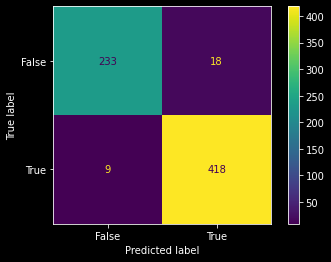

In [51]:
from sklearn import metrics
actual = Actual
predicted =labels_test

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

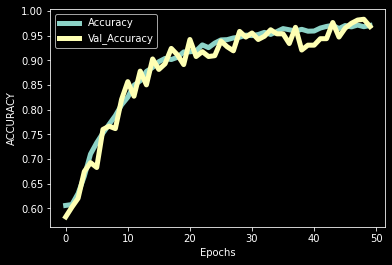

In [52]:
plt.plot(CNN_lstm_Model.history["accuracy"],label="Accuracy",linewidth=5)
plt.plot(CNN_lstm_Model.history["val_accuracy"],label="Val_Accuracy",linewidth=5)
plt.xlabel("Epochs")
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

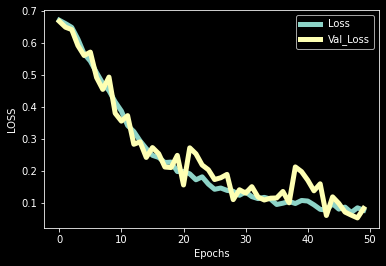

In [53]:
plt.plot(CNN_lstm_Model.history["loss"],label="Loss",linewidth=5)
plt.plot(CNN_lstm_Model.history["val_loss"],label="Val_Loss",linewidth=5)
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

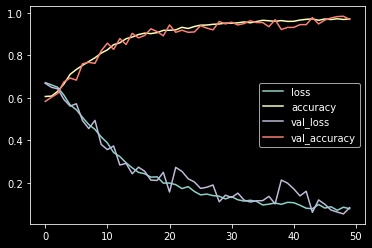

In [54]:
Dict_Summary = pd.DataFrame(CNN_lstm_Model.history)
Dict_Summary.plot()